In [1]:
import os, sys
import pickle

import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

from get_forecasting_model import *

Using: cpu


In [2]:
# df = pd.read_csv(os.path.join(project_root, 'data', 'processed', f"train.csv"))

df = pd.read_csv('D:/Study/Education/Projects/DataFlow/DataFlow_2026/data/processed/test.csv')

In [6]:
df.head(2)

,ip,identd,user,time,request,status,size,resource,protocol,utc,status_label
0,199.72.81.55,-,-,1995-07-01 00:00:01,GET /history/apollo/ HTTP/1.0,200,6245.0,/history/apollo/,HTTP/1.0,UTC - 04,Success
1,unicomp6.unicomp.net,-,-,1995-07-01 00:00:06,GET /shuttle/countdown/ HTTP/1.0,200,3985.0,/shuttle/countdown/,HTTP/1.0,UTC - 04,Success


In [6]:
predictor = Predictor('sarimax', '5min')

X, y, y_pred = predictor.get_prediction(df)

y_pred

Using: cpu


array([1688353.39935011, 1254390.37648906, 1298128.91459013, ...,
       2899785.06789651, 3399251.2986637 , 2051521.10543025],
      shape=(2592,))

In [7]:
# y_pred = np.exp(y_pred)
# y_true = np.exp(y)

y_true = y

r2 = r2_score(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
mape = mean_absolute_percentage_error(y_true, y_pred)

print(f"R^2: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")

R^2: 0.5890
RMSE: 1344494.1725
MAE: 998888.6052
MAPE: 0.3753


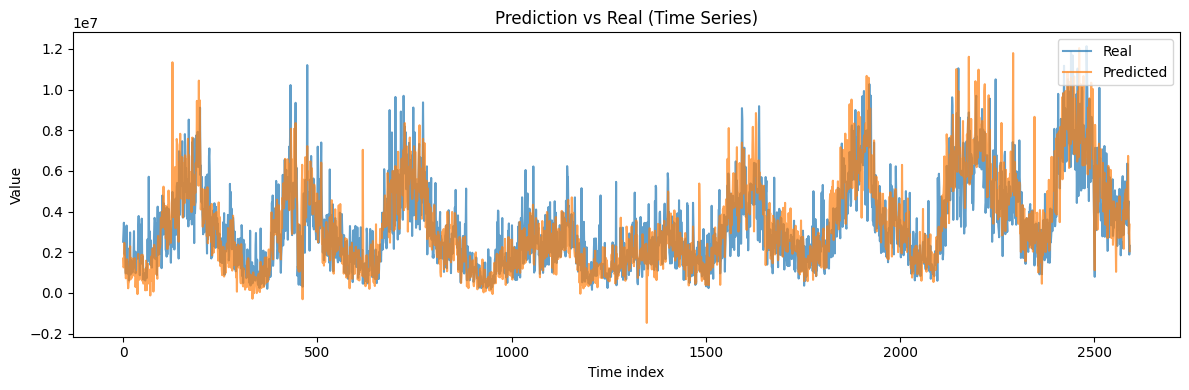

In [8]:
t = range(len(y))

plt.figure(figsize=(12, 4))
plt.plot(t, y_true, label="Real", alpha=0.7)
plt.plot(t, y_pred, label="Predicted", alpha=0.7)

plt.title("Prediction vs Real (Time Series)")
plt.xlabel("Time index")
plt.ylabel("Value")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()